# Glosten-Milgrom Model

## Introduction

## Deriving the model

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm
import pandas as pd

from plotter import PlotterWindow

sm.init_printing(use_unicode=True)

make symbols

In [2]:
mu_t = sm.symbols("mu_t")
mu_t1 = sm.symbols("mu_t-1")
b_t = sm.symbols("b_t")
a_t = sm.symbols("a_t")
p_t = sm.symbols("P_t")
v = sm.symbols("v")
v_h = sm.symbols("v^H")
v_l = sm.symbols("v^L")
d_t = sm.symbols("d_t")
sd_t = sm.symbols("s(d_t)")
s_a = sm.symbols("s_t^a")
s_b = sm.symbols("s_t^b")
theta_t = sm.symbols("theta_t")
theta_t1 = sm.symbols("theta_t-1")
pi = sm.symbols("pi")
beta_b = sm.symbols("beta_B")
beta_s = sm.symbols("beta_S")
spib = sm.symbols("Pi_buy")
spis = sm.symbols("Pi_sell")

#pvh=sm.symbols("p(v_h)")
#pb=sm.symbols("p(Buy)")
#pbvh= sm.symbols('p(Buy|v_h)\space')
#pbvl= sm.symbols('p(Buy|v_l)\space')
#pvhb= sm.symbols('p(v_h|Buy)\space')
#pvlb=sm.symbols('p(v_l|Buy)\space')

theta_p=sm.symbols("theta^+")
theta_m=sm.symbols("theta^-")

There is a single market with 1 dealer. The dealer buys and sells a single security at the ask price $a_t$ and bid price $b_t$. In every time period t he takes a single order from a single trader. The order is denoted $d_t$ which takes the value 1 for buy order, -1 for a sale order and 0 for no order.

On the market there are two types of traders, Informed traders and liquidity traders. The informed traders have a high amount of information about the security and knows the true value of it. Further they seek to maximize their profit trading with the security, which leads to only buying if the security value higher than the ask price and only selling selling if the value is lower than the bid price.
Liquidity traders do not have information about the security or rather, they dont care. These traders buys or sells the security independent on the value of the security. Among liquidity traders you find traders who either seeks to diversify their portfolio, thus buy, or who needs to liquify some assets. The liquidity trader buys with probability $\beta_B$ and sells with probability $\beta_S$.

$\pi$ share of the traders is informed traders.

On the market there is unequal information. The informed traders have private information about the value of the security. The dealer only has access to public information about the market, such as the ratio of informed traders. The dealer however receives information with each trade order. An informed trader would never sell if $a_t<v$, therefore an unequal amount of buy orders would indicate $v=v^H$


Before we start on our model equations we make two assumptions:<br> i) The dealer is risk neutral and is in a competitive. <br> ii) there is no trade cost on orders on the market

To simplify our model we set the security v to be binary distributed taking the value $v^H$ or $v^L$, the superscript denoting high and low value.

The dealer has the belief $\theta_t$, which is his estimate of the probability $p(v=v^h)=\theta$. From his belief he finds his expected value of security v denoted $\mu_t$

In [17]:
sm.Eq(mu_t,theta_t*v_h+(1-theta_t)*v_l) 

The dealer sets his ask and bid price based on his expectition to v conditional on the information $\Omega_{t-1}$ and whether he expects a buy or sell order.
$$a_t=E(v\mid \Omega_{t-1} , d_t=1)$$
$$b_t=E(v\mid \Omega_{t-1} , d_t=-1)$$
Further, since the dealer is in a competitive market he sets the ask and bid price according to an expected null profit. Since the dealer does not know the true value of the security, he loses on every trade made with an informed trader. The deficit is made up by trading with liquidity traders. Based on his expectation to the security and his knowledge of the market, he derives the following profit functions

In [18]:
sm.Eq(theta_t1*pi*(a_t-v_h)+beta_b*(1-pi)*(a_t-mu_t1), sm.symbols("Pi^buy_t"))

In [19]:
sm.Eq((1-theta_t1)*pi*(v_l-b_t)+beta_s*(1-pi)*(mu_t1-b_t),sm.symbols("Pi^sell_t"))

From these profits he derives his optimal ask and bid price.

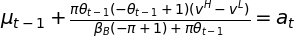

In [20]:
sm.Eq(mu_t1+(pi*theta_t1*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_b)*(v_h-v_l), a_t)

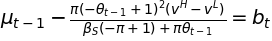

In [21]:
sm.Eq(mu_t1-(pi*(1-theta_t1)*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_s)*(v_h-v_l),b_t)

The ask and bid price equal the dealers expected value of the security with a markup and discount respectively. We denote the markup $s_t^a$ and the discount $s_t^b$

In [22]:
sm.Eq((pi*theta_t1*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_b)*(v_h-v_l), s_a)
sm.Eq(mu_t1+s_a, a_t)

In [23]:
sm.Eq((pi*(1-theta_t1)*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_s)*(v_h-v_l), s_b)
sm.Eq(mu_t1-s_b, b_t)

Depending on the trade order the dealer receives in period t, his beliefs about the value of the security in period t+1 is changed.
$$\theta_t^{+}\equiv P(v=v^H|\Omega_{t-1},d_t=1)$$
$$\theta_t^{-}\equiv P(v=v^L|\Omega_{t-1},d_t=-1)$$

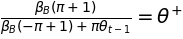

In [24]:
sm.Eq(((1+pi)*beta_b)/(pi*theta_t1+(1-pi)*beta_b),theta_p)

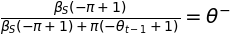

In [25]:
sm.Eq(((1-pi)*beta_s)/(pi*(1-theta_t1)+(1-pi)*beta_s),theta_m)

With his updated beliefs about the security, the dealer updates his expectation of the value of the security for the period t+1. If the dealer recieved a buy order in in period t, his expectation $\mu$ can be shown to have the following relation 
$$\mu^+_{t+1}-\mu_t=s_t^a$$
The dealers expectation for any order is therefore 
$$\mu_t=\mu_{t-1}+s(d_t)d_t$$
with $s(d_t)\equiv \begin{cases} s_t^a & d_t=1 \\ s_t^b & d_t=-1 \end{cases}$

In [7]:
abs(v-p_t)
p_t=mu_t1+buyprob*sa+sellprob*sb
p_t=mu_t1+buyprob*sa+sellprob*sb


funcmini = abs(v-p_t)
sm.lambdify
spib = theta_t1*pi*(a_t-v_h)+beta_b*(1-pi)*(a_t-mu_t1)
spis = (1-theta_t1)*pi*(v_l-b_t)+beta_s*(1-pi)*(mu_t1-b_t)

a_t = mu_t1 + s_a
b_t = mu_t1 - s_b

s_a = (pi*theta_t1*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_b)*(v_h-v_l)
s_b = (pi*(1-theta_t1)*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_s)*(v_h-v_l)



In [26]:
markup = sm.Eq(((1+pi)*beta_b)/(pi*theta_t1+(1-pi)*beta_b),theta_p)

a_t*markup

TypeError: 'Equality' object is not callable

## Simulation of the model


![Flowchart](flowchart.png)

In [26]:
def simulation(distribution=(0,1), decision="v_h", ratio=0.2, uninformed=0.5, startvalue=0.5, iterations = 500, seed=5000, epsilon=10**-5, shockperiod = None, shock={}):
    #define constants
    v_l, v_h = distribution
    pi = ratio
    beta_b = uninformed
    beta_s = 1-beta_b
    shock = shock
    
    #determine realized value of v
    v = decision
    
    #allocate space
    values={}
    ratiovalues = []
    iteration = []
    thetavalues = np.empty(iterations)
    muvalues = np.empty(iterations)
    askvalues = np.empty(iterations)
    bidvalues = np.empty(iterations)
    gapvalues = np.empty(iterations)
    pivalues = np.empty(iterations)
    decisionvalues = np.empty(iterations)
    
    #simulation settings
    thetavalues[0]=startvalue
    theta_t1 = startvalue
    N = iterations
    np.random.seed(seed)
    
    break_index = 0
    for i in range(N):
        
        if i==shockperiod:
            if shock != {}:
                if "Public" not in shock:
                    if shock["Private"]==1:
                        v="v_h"
                    if shock["Private"]==0:
                        v="v_l"

                elif "Private" not in shock:
                    v_l, v_h = shock["Public"] 
                    v = decision
                
                else:
                    v_l, v_h = shock["Public"]
                    if shock["Private"]==1:
                        v="v_h"
                    if shock["Private"]==0:
                        v="v_l"
                    
        if v=="v_h":
            v=v_h
        elif v=="v_l":
            v=v_l
            
        
        mu_t1 = theta_t1*v_h+(1-theta_t1)*v_l
        muvalues[i] = mu_t1
        
        #calculate markup/discount
        s_a = (pi*theta_t1*(1-theta_t1))/(pi*theta_t1+(1-pi)*beta_b)*(v_h-v_l)
        s_b = (pi*theta_t1*(1-theta_t1))/(pi*(1-theta_t1)+(1-pi)*beta_s)*(v_h-v_l)
        
        #calculate ask/bid price
        askvalues[i] = a_t = mu_t1 + s_a
        bidvalues[i] = b_t = mu_t1 - s_b 
        
        #calculate gap
        gapvalues[i] = gap_t = a_t - b_t
        
        #realize pi
        trader = np.random.binomial(1,pi)
        pivalues[i] = trader
        #if trader is informed
        if trader == 1:
            if v == v_h:
                if v_h>a_t:
                    d_t=1
            elif v == v_l:
                if v_l<b_t:
                    d_t=-1
            else:
                d_t=0
                    
        #if trader is uninformed
        if trader == 0:
            buysell = np.random.binomial(1,beta_b)
            if buysell == 1:
                d_t = 1
            else:
                d_t = -1
        
        decisionvalues[i] = d_t
        
        #update theta
        if d_t == 1:
            theta_t = ((1+pi)*beta_b)/(pi*theta_t1+(1-pi)*beta_b)*theta_t1
            theta_t1 = theta_t
        elif d_t == -1:
            theta_t = ((1-pi)*beta_b)/(pi*(1-theta_t1)+(1-pi)*beta_b)*theta_t1
            theta_t1 = theta_t
        
        if i<iterations-1:
            thetavalues[i+1] = theta_t
        ratiovalues.append(str(ratio))
        iteration.append(int(i))
        
        #off by one error
        break_index=i+1
        if gap_t<epsilon or i == N-1:
            values.update({"Theta": theta_t,"Bid": b_t, "Ask": (a_t), "Mu": mu_t1, "Equilibrium period": break_index-1})
            break
            
    
    dataframe = pd.DataFrame()
    dataframe["Iteration"] = iteration
    dataframe["ratio"] = ratiovalues
    dataframe["theta"] = thetavalues[0:break_index]
    dataframe["mu"] = muvalues[0:break_index]
    dataframe["ask"] = askvalues[0:break_index]
    dataframe["bid"] = bidvalues[0:break_index]
    dataframe["spread"] = gapvalues[0:break_index]
    dataframe["trader"] = pivalues[0:break_index]
    dataframe["order"] = decisionvalues[0:break_index]
    
    return dataframe, values

In [75]:
def numericalsolution(N=1000, ratio=0.15):
    data = pd.DataFrame()
    
    for i in range(N):
        seed = int(np.random.uniform(0,10000))
        dataframe, values = simulation(distribution=(0,10), ratio=ratio, startvalue=0.5, iterations = 1001, seed=seed, epsilon=5**-5)
        
        for key in values:
            data.loc[i,key]=values[key]
            
    meanvalues = {}
    for key in list(data.columns):
        meanvalues[key]=data[key].mean()
    return meanvalues

In [76]:
ratiolist = []
periodlist = []
for i in range(98):
    num = ((i+1)/100)
    values = numericalsolution(ratio=num)
    
    ratiolist.append(num)
    periodlist.append(values["Equilibrium period"])

{'Theta': 0.9999767533568719,
 'Bid': 9.999634397522978,
 'Ask': 9.999868380028435,
 'Mu': 9.999780635305795,
 'Equilibrium period': 85.546}

In [71]:
data=pd.DataFrame()
values={"ne": 1, "yo": 3}
for key in values:
    data.loc[0, key]=values[key]
print(data)

    ne   yo
0  1.0  3.0


In [27]:
thetarun1 = simulation(ratio=0.15, iterations=201,seed=4795)
thetarun2 = simulation(ratio=0.15, iterations=201,seed=6279)
thetarun3 = simulation(ratio=0.15, iterations=201,seed=6130)
thetarun4 = simulation(ratio=0.15, iterations=201,seed=9352)
thetarun5 = simulation(ratio=0.15, iterations=201,seed=5059)

thetadata1, thetavalues1 = thetarun1
thetadata2, thetavalues2 = thetarun2
thetadata3, thetavalues3 = thetarun3
thetadata4, thetavalues4 = thetarun4
thetadata5, thetavalues5 = thetarun5

Text(0.5, 1.0, 'Theta')

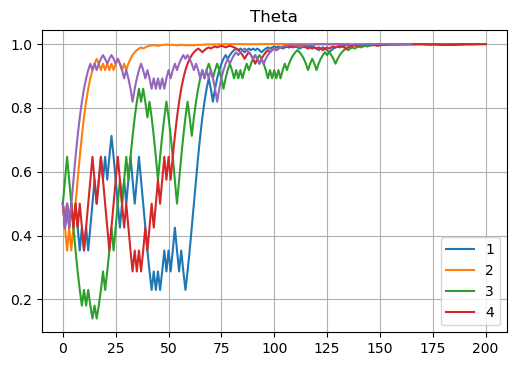

In [28]:
fig = plt.figure(dpi=100)
ax2 = fig.add_subplot(1,1,1)
ax2.plot(thetadata1["theta"], label="1")
ax2.plot(thetadata2["theta"], label="2")
ax2.plot(thetadata3["theta"], label="3")
ax2.plot(thetadata4["theta"], label="4")
ax2.plot(thetadata5["theta"], label="")
ax2.grid(True)
ax2.legend()
ax2.set_title("Theta")

In [10]:
pirun1 = simulation(ratio=0.10, iterations=1001, seed=404)
pirun2 = simulation(ratio=0.15, iterations=1001, seed=404)
pirun3 = simulation(ratio=0.25, iterations=1001, seed=404)
pirun4 = simulation(ratio=0.5, iterations=201, seed=404)
pirun5 = simulation(ratio=0.9, iterations=201, seed=404)

pirundata1, pirunvalues1 = pirun1
pirundata2, pirunvalues2 = pirun2
pirundata3, pirunvalues3 = pirun3 
pirundata4, pirunvalues4 = pirun4
pirundata5, pirunvalues5 = pirun5

pirunmerged = pd.concat([pirundata1, pirundata2, pirundata3, pirundata4, pirundata5])

In [11]:
pirungraphwindow = PlotterWindow(data = pirunmerged, slicename = "ratio", xvariable = "Iteration", yvariablelist = ["mu","ask","bid"], graphtype ="piplot")
pirungraphwindow.start()

C:\Users\Corfixen\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


In [12]:
pirungraphwindow2 = PlotterWindow(data = pirunmerged, slicename = "ratio", graphtype = "candlestick")
pirungraphwindow2.start()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [13]:
shockrun1 = simulation(ratio=0.151, iterations=1001, seed=404, shockperiod = 90, shock={"Private":0})
shockrun2 = simulation(ratio=0.152, iterations=1001, seed=404, shockperiod = 90, shock={"Public":(0.3, 0.8)})
shockrun3 = simulation(ratio=0.153, iterations=1001, seed=404, shockperiod = 90, shock={"Private":0, "Public":(0.3,0.8)})

shockdata1, shockvalues1 = shockrun1
shockdata2, shockvalues2 = shockrun2
shockdata3, shockvalues3 = shockrun3

shockmerged = pd.concat([shockdata1,shockdata2,shockdata3])

In [14]:
shockgraphwindow = PlotterWindow(data = shockmerged, slicename = "ratio", xvariable = "Iteration", yvariablelist = ["mu","ask","bid"], graphtype="piplot")
shockgraphwindow.start()